***<center>Нормальное распределение<br>и<br>Центральная предельная теорема</center>***

Нормальное распределение задается двумя параметрами:
- средним;
- стандартным отклонением.

***<center>Правило 3х сигм</center>***

*Вероятность того, что случайная величина отклонится от своего мат ожидания на большую величину,
чем утроенное среднее квадратичное отклонение, стремится к нулю. (Только для нормального распределения)*

***<center>Центральная предельная теорема</center>***

*Если взять ГС, принадлежащую всякому распределению, а затем начать из него генерировать выборки
размером n и считать средние, то средние всех выборок начинают концентрироваться вокруг истинного среднего ГС.
А сама форма распределения становится нормальным с увеличением числа выборок.*
<center>=</center>

*При генерации n выборок из генеральной совокупности средняя выборка концентрируется
вокруг среднего генеральной совокупности.*

Согласно с ЦПТ, среднее выборочных средних равно среднему исходной совокупности,
а СО - стандартная ошибка среднего (СОС).

Строгая формулировка ЦПТ:
    ***Выборочные средние имеют приближенно нормальное распределение независимо от распределения
    исходной совокупности, из которых были извлечены выборки.***
    Среднее значение всех возможных выборочных средних равно среднему исходной совокупности.
    СО всех возможных выборочных средних данного объема, называемое СОС, зависит как от СО
    совокупности, так и от объема выборки.
    При этом:
    - Выборки должны извлекаться случайно;
    - Размер выборки не должен превышать 10% размера всей ГС;
    - Размер выборки должен быть достаточно большим.

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

np.random.seed(1234)
%matplotlib inline

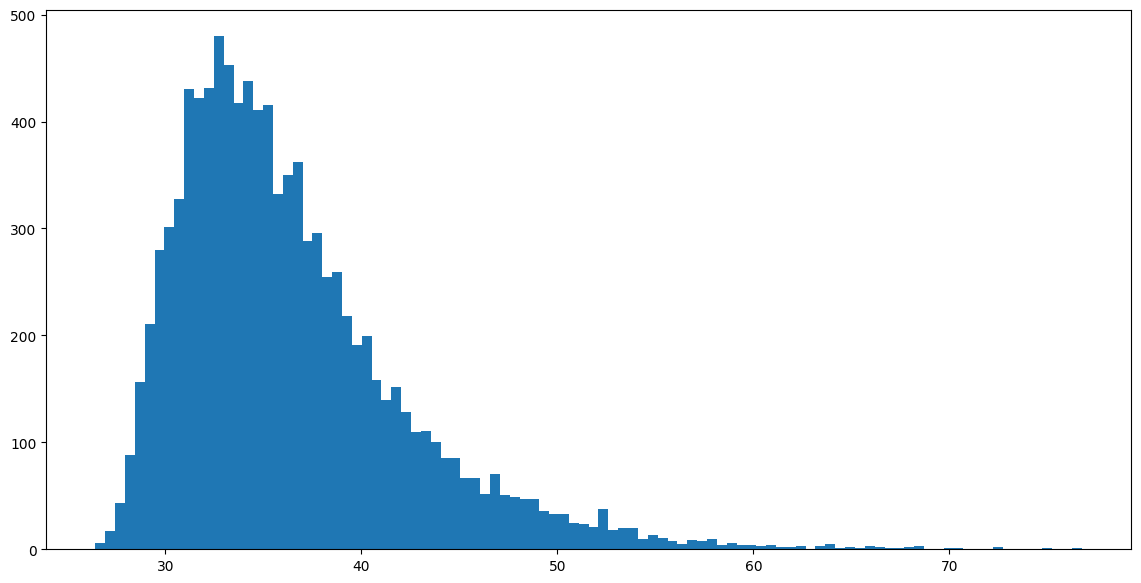

In [66]:
ln_distrib = stats.lognorm(.5, loc=25, scale=10)
gen_pop_ln = ln_distrib.rvs(size=10000)

fig = plt.figure(figsize=(14, 7))
ax1 = plt.subplot(111)
plt.hist(gen_pop_ln, 100)
plt.show()

In [67]:
n = 20
avg = []
for i in range(1000):
    sample = np.random.choice(gen_pop_ln, n, replace=False)
    avg.append(np.mean(sample))

In [68]:
%matplotlib inline
import matplotlib.animation as anim
# from wand.image import Image
# from wand.display import display
from IPython import display

def clt(current):
    # if the animation is at the last frame, stop it
    plt.cla()
    if current == 1000:
        a.event_source.stop()
        
    plt.hist(avg[:current], bins=20)
    plt.annotate(f'Выборка = {current}', [3, 27])

fig = plt.figure()
a = anim.FuncAnimation(fig, clt, frames=500, interval=30)
video = a.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

